In [1]:
from globalVariables import *
import simpleCNN as simpleCNN
from testTrainSplit import getTestTrainSets

In [2]:
trainingSet, testSet = getTestTrainSets(split=0.7)
class_names, counts = np.unique(trainingSet['labels'], return_counts=True)

In [4]:
model = tf.keras.models.load_model('pickles/mainCNNmodel_lr_-4.h5')


2022-06-17 16:04:12.419520: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 16:04:12.420427: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64::/data2/harvey/lib/gsl/lib:/data2/harvey/lib/cfitsio/lib:/data2/harvey/lib/boost/lib:/data2/harvey/lib/CCfits/lib
2022-06-17 16:04:12.420576: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64::/data2/harvey/lib/gsl/lib:/data2/harvey/lib/cfitsio/lib:/data2/harvey/lib/boost/lib:/data2/harvey/lib/CCfits/lib
2022-06-17 16:04

In [ ]:
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Convert ht image to Array of dimension (150,150,3)
x   = trainingSet["samples"][0]
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

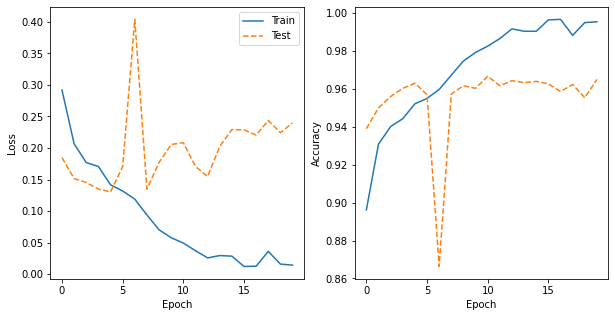

In [2]:
csv_file = 'pickles/main_lr_-4.csv'


color=['r','g','b','c','y','orange']
fig, [ax1, ax2]  = plt.subplots( 1, 2, figsize=(10,5))

trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
    
ax1.plot(trainHistory['loss'], '-',label='Train')
ax1.plot(trainHistory['val_loss'], '--',label='Test')
ax2.plot(trainHistory['accuracy'], '-',label='Train')
ax2.plot(trainHistory['val_accuracy'], '--',label='Test')
ax2.set_ylabel("Accuracy")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epoch")
ax2.set_xlabel("Epoch")
ax1.legend()

In [5]:
data = np.load("../data/nndata.npy")
dataOld = np.load("../data/nndata_17_06_22.npy")

In [6]:
np.vstack((data, dataOld)).shape

(20000, 100, 100)

In [2]:
trainingSet, testSet = getTestTrainSets(split=0.2)



In [3]:
trainingSet['samples'].shape

(16000, 100, 100, 1)